<a href="https://colab.research.google.com/github/RAHULRAJ666DX/Capston-Hotel-Booking-Analysis-/blob/main/EDA_Hotel_Booking_Analysis_Rahul_Raj.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <font color=darkblue>**PROBLEM STATEMENT:**

<b> Have you ever wondered when the best time of year to book a hotel room is? Or the optimal length of stay in order to get the best daily rate? What if you wanted to predict whether or not a hotel was likely to receive a disproportionately high number of special requests? This hotel booking dataset can help you explore those questions!

<b>This data set contains booking information for a city hotel and a resort hotel, and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things. All personally identifying information has been removed from the data. </b>

Explore and analyze the data to discover important factors that govern the bookings. </b>

## **<font color=darkblue>Mounting drive**

In [ ]:
from google.colab import drive     
drive.mount('/content/drive')

##**<font color=darkblue> Importing all required Libraries**

In [1]:
import numpy as np               #numpy to handle numerical calculation
import pandas as pd              #pandas for handling the dataset 
import matplotlib as mp          #matplotlib for plotting
import matplotlib.pyplot as plt  #matplotlib for visulazing
import seaborn as sns            #seaborn for visulazing different cases
%matplotlib inline
import missingno as ms           #for visualisation of the missing values

##**<font color=darkblue>Reading and Inspection**

In [2]:
#I am adding the Github link for the Dataset

url = "https://raw.githubusercontent.com/RAHULRAJ666DX/Capston-Hotel-Booking-Analysis-/main/Hotel%20Bookings.csv"
df = pd.read_csv(url)

##**<font color=darkblue>Data Exploration**

In [3]:
# Checking The size of the Dataset

df.shape
print( f"The shape of the dataset is {df.shape}" )

The shape of the dataset is (119390, 32)


In [4]:
# Checking how the data is looking

df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [5]:
#Checking the Information on each column

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [6]:
#Checking Columns

df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [7]:
#looking at the min, max values,mean values etc. NAN values for mean,25% ,50%,75%,max indicates those are categorical columns.

df.describe(include='all')

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
count,119390,119390.000000,119390.000000,119390.000000,119390,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,...,119390,103050.000000,6797.000000,119390.000000,119390,119390.000000,119390.000000,119390.000000,119390,119390
unique,2,NaN,NaN,NaN,12,NaN,NaN,NaN,NaN,NaN,...,3,NaN,NaN,NaN,4,NaN,NaN,NaN,3,926
top,City Hotel,NaN,NaN,NaN,August,NaN,NaN,NaN,NaN,NaN,...,No Deposit,NaN,NaN,NaN,Transient,NaN,NaN,NaN,Check-Out,2015-10-21
freq,79330,NaN,NaN,NaN,13877,NaN,NaN,NaN,NaN,NaN,...,104641,NaN,NaN,NaN,89613,NaN,NaN,NaN,75166,1461
mean,NaN,0.370416,104.011416,2016.156554,NaN,27.165173,15.798241,0.927599,2.500302,1.856403,...,NaN,86.693382,189.266735,2.321149,NaN,101.831122,0.062518,0.571363,NaN,NaN
std,NaN,0.482918,106.863097,0.707476,NaN,13.605138,8.780829,0.998613,1.908286,0.579261,...,NaN,110.774548,131.655015,17.594721,NaN,50.535790,0.245291,0.792798,NaN,NaN
min,NaN,0.000000,0.000000,2015.000000,NaN,1.000000,1.000000,0.000000,0.000000,0.000000,...,NaN,1.000000,6.000000,0.000000,NaN,-6.380000,0.000000,0.000000,NaN,NaN
25%,NaN,0.000000,18.000000,2016.000000,NaN,16.000000,8.000000,0.000000,1.000000,2.000000,...,NaN,9.000000,62.000000,0.000000,NaN,69.290000,0.000000,0.000000,NaN,NaN
50%,NaN,0.000000,69.000000,2016.000000,NaN,28.000000,16.000000,1.000000,2.000000,2.000000,...,NaN,14.000000,179.000000,0.000000,NaN,94.575000,0.000000,0.000000,NaN,NaN
75%,NaN,1.000000,160.000000,2017.000000,NaN,38.000000,23.000000,2.000000,3.000000,2.000000,...,NaN,229.000000,270.000000,0.000000,NaN,126.000000,0.000000,1.000000,NaN,NaN


In [8]:
# checking the datatypes of all the columns

df.dtypes

hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                       object
agent                             

# **DATA CLEANING**

### **Removing the 'DUPLICATE' rows from the Dataset**

In [10]:
df.duplicated().value_counts()


False    87396
True     31994
dtype: int64

**Visualising a PLOT to see the duplicate values**

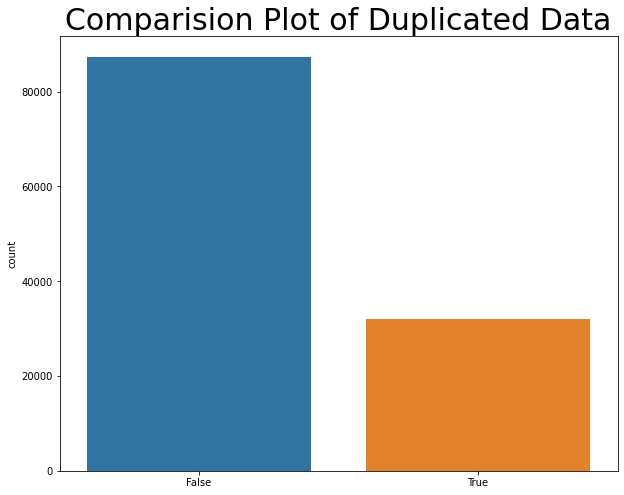

In [11]:
plt.figure(figsize=(10,8))
plt.title('Comparision Plot of Duplicated Data',size=30)
sns.countplot(x=df.duplicated())


In [12]:
# Dropping the Duplicates

df = df.drop_duplicates()

In [13]:
# verifying the total duplicates again\

df.duplicated().sum()

0

## **NULL values operations**

**Checking the occurence of NULL values**

In [9]:
# Checking the occurence of NULL values

df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

**Visualising the Null values quantity with respect to the Dataset Using 'missingno' library**

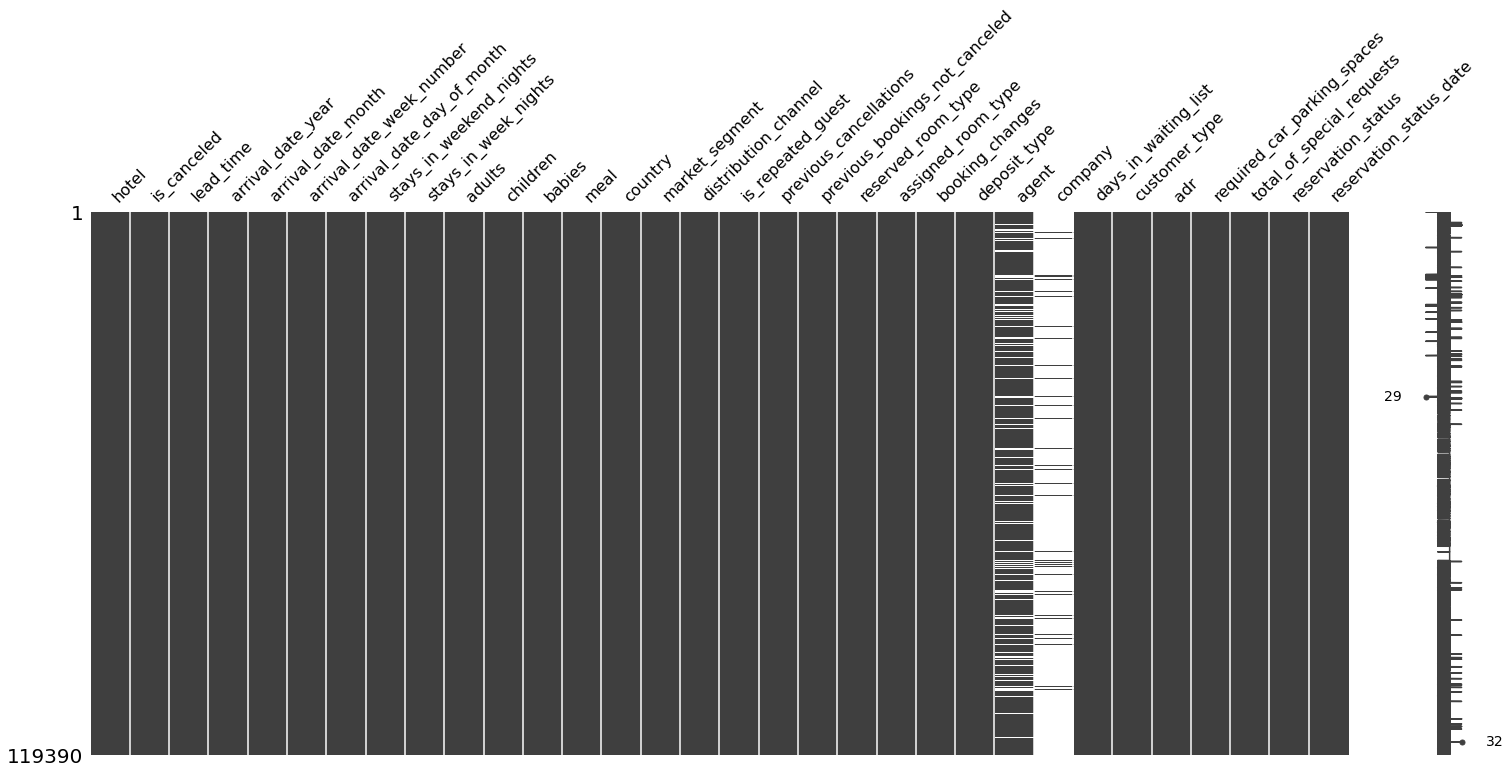

In [10]:
ms.matrix(df)

## **DROPPING 2 columns which has a lot of NULL values**

In [11]:
df.isna().sum().sort_values(ascending=False)[:5]

company               112593
agent                  16340
country                  488
children                   4
reserved_room_type         0
dtype: int64

In [12]:
# DROPPING the column with most missing values 

df.drop(['company','agent'],axis=1,inplace=True)

In [13]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type',
       'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

## **Replacing Null values with MODE for babies column since the number is very small**


In [17]:
# df['children'].fillna(df['children'].mode(),inplace=True)

df.children.fillna(df.children.mode,inplace=True)

In [18]:
df.children.isna().sum()

0

In [19]:
df.isna().sum().sort_values(ascending=False)[:5]

country                      488
hotel                          0
is_repeated_guest              0
reservation_status             0
total_of_special_requests      0
dtype: int64

## **Replacing NaN values with 'Others' for 'country' column**


In [20]:
# NaN value count in the Country column

df.country.isna().sum()

488

**Since there are only 488 missing data in the country column we can just replace all those with 'Others' by generalizing them all**

In [21]:
# Replace Operation

df['country'].fillna('others',inplace=True)

**Since there are only 488 missing data in the country column we can just replace all those with 'Others' by generalizing them all**

In [22]:
# NO MORE NULL VALUES WE CAN NOW START ANALYSING THE DATA

df.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests   

##**1.Which Hotel Type is more used**

### **Visualising Annual Hotel Booking between City hotels and Resort hotels**

In [28]:
# Finding the Total Types of Hotels

df.hotel.unique().tolist()

['Resort Hotel', 'City Hotel']

**SO there are two types of Hotels in the Dataset and we will check what is the total number of Hotels in the Dataset.**
 
**Now to get the Value Count of each type of the Hotel in the Dataset** 

In [29]:
df.hotel.value_counts()

City Hotel      79330
Resort Hotel    40060
Name: hotel, dtype: int64

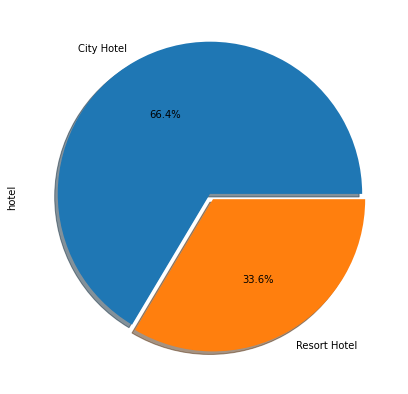

In [30]:
# sns.countplot(x=df.hotel)

df['hotel'].value_counts().plot(kind='pie',autopct='%0.1f%%',explode=[0.02,0.02],shadow=True)

###**So there are a Lot more of City hotels then there are Resort Hotels** 

In [31]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type',
       'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

###**Using Arrival Date Month Comparing how many Bookings were made for Hotels to Compare**


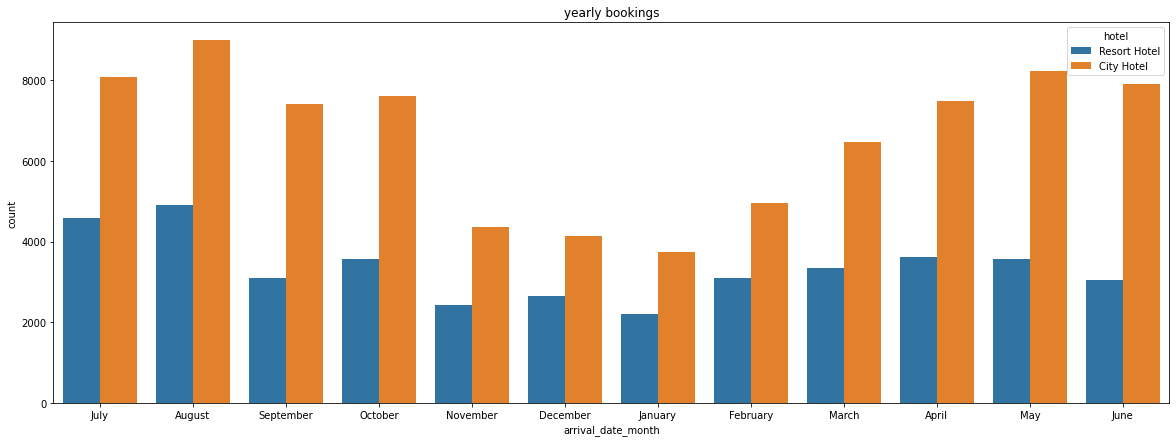

In [32]:
# Using Arrival Date Month Comparing how many Bookingd were made for Hotels to Compare
sns.countplot (x= 'arrival_date_month', data= df, hue= 'hotel').set_title ('yearly bookings')
# plt.title('yearly bookings')
plt.rcParams['figure.figsize'] = (20, 7)


### **Observation**
### **1.As per the Observations we can conclude that City Hotels had more bookings then the Resort Hotels.**
### **2.Since it is more easily accessible Guests prefer to use City Hotels more then Resort hotels**

## **2.Which Country the Guests are coming from to the Hotels.**

In [36]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type',
       'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

**Pie Chart will be very hard to read so lets create a Bar Plot of top ten Countries with most guest count**

Text(0, 0.5, 'Number of Guests')

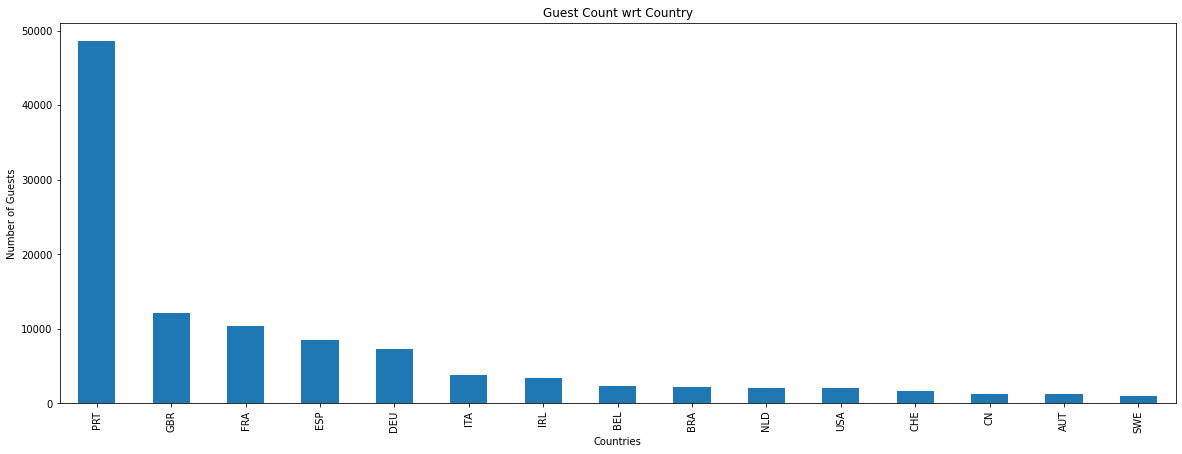

In [37]:
df.country.value_counts()[:15].plot(kind='bar')
plt.title('Guest Count wrt Country')
plt.xlabel('Countries')
plt.ylabel('Number of Guests')


In [38]:
df.country.value_counts()[:15].reset_index()

,index,country
0,PRT,48590
1,GBR,12129
2,FRA,10415
3,ESP,8568
4,DEU,7287
5,ITA,3766
6,IRL,3375
7,BEL,2342
8,BRA,2224
9,NLD,2104


### **Observation**
### **1.As per the Observations we can see the list of countries with most of the guests are from**
### **2.As per the report Portugal is the country with most guests followed by Britain & France**

## **2.How many cancellations in both types of hotel.**

In [39]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type',
       'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [40]:
df.is_canceled.value_counts()

0    75166
1    44224
Name: is_canceled, dtype: int64

**Total cancellation in the Dataset is 24025**

##**To create a plot to see how many cancellations with respect to City Hotel and Resort Hotel**

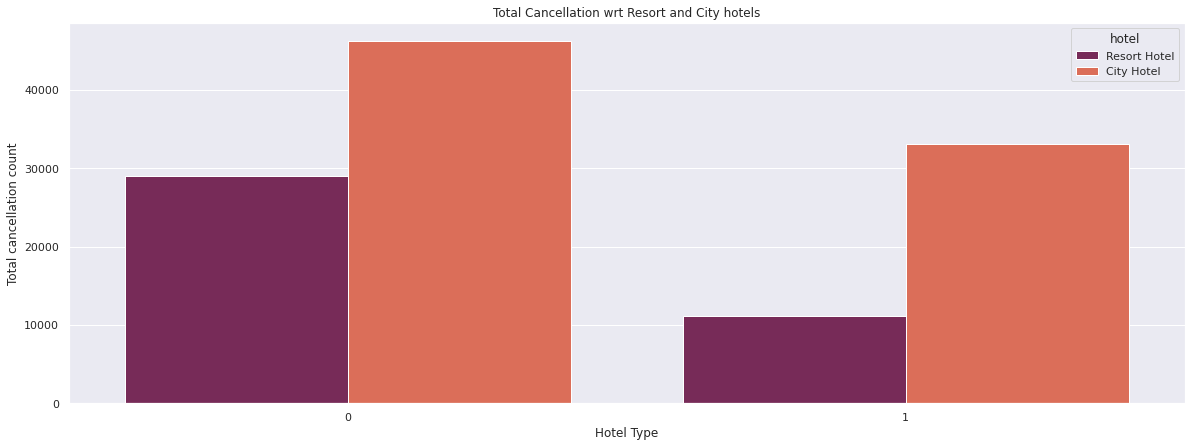

In [41]:
sns.set(style = "darkgrid")

sns.countplot(x='is_canceled', hue='hotel',data=df,palette="rocket")
plt.title("Total Cancellation wrt Resort and City hotels")
plt.xlabel("Hotel Type")
plt.ylabel("Total cancellation count")
plt.rcParams['figure.figsize'] = (12, 5)

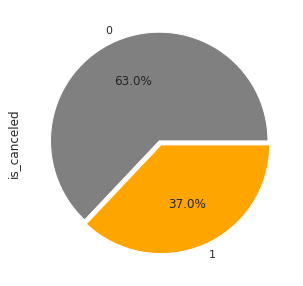

In [51]:
col=['grey','orange']
df['is_canceled'].value_counts().plot(kind='pie', explode=(0.02,0.02), autopct='%1.1f%%',colors=col)

**27.48% Cancellations**

In [43]:
df.is_canceled.value_counts()

0    75166
1    44224
Name: is_canceled, dtype: int64

**How many cancellations for Resort Hotels and City Hotels**

In [44]:
# Create a DF of only Cancelled Data

Total_cancelled = df[df['is_canceled']==1]

In [45]:
Total_cancelled.groupby('hotel').size()

hotel
City Hotel      33102
Resort Hotel    11122
dtype: int64

Text(0.5, 0, 'Hotels')

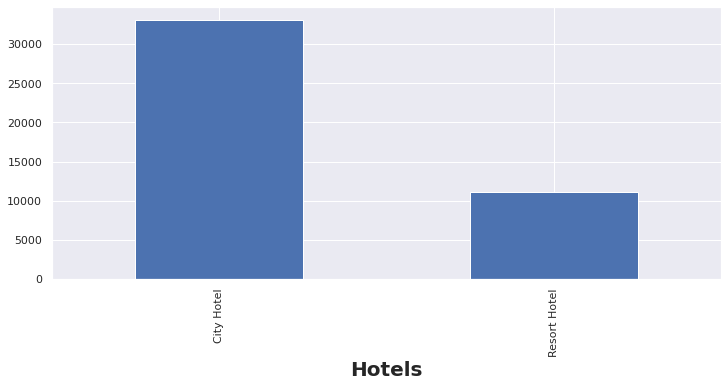

In [46]:
Total_cancelled.groupby('hotel').size().plot(kind='bar')
plt.xlabel('Hotels',fontsize=20,fontweight='bold')

Text(0.5, 0, 'Hotels')

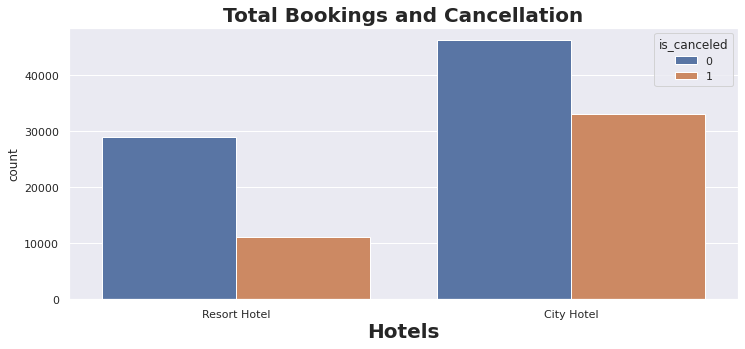

In [47]:
sns.countplot(x='hotel',hue='is_canceled',data=df)
plt.title("Total Bookings and Cancellation",fontweight="bold", size=20)
plt.xlabel('Hotels',fontsize=20,fontweight='bold')


In [48]:

Total_cancelled.groupby('hotel').size()


hotel
City Hotel      33102
Resort Hotel    11122
dtype: int64

In [49]:
df.is_canceled.value_counts(normalize=True)

0    0.629584
1    0.370416
Name: is_canceled, dtype: float64

### **Observation**
### **1.27.48% of the total bookings were cancelled**
### **2.As per the Observations City Hotels has 16049 cancellations**
### **3.As per the Observations Resort Hotels has 7976 cancellations**

## **Which Type of Rooms is getting Booked**

In [52]:
df.reserved_room_type.unique()

array(['C', 'A', 'D', 'E', 'G', 'F', 'H', 'L', 'P', 'B'], dtype=object)

**There are a total of 10 Room Types**

**Total Count of the Roomms Booked with respect to Type**

In [53]:
df.reserved_room_type.value_counts().reset_index()

,index,reserved_room_type
0,A,85994
1,D,19201
2,E,6535
3,F,2897
4,G,2094
5,B,1118
6,C,932
7,H,601
8,P,12
9,L,6


In [54]:
df.reserved_room_type.value_counts(normalize=True).reset_index()

,index,reserved_room_type
0,A,0.720278
1,D,0.160826
2,E,0.054737
3,F,0.024265
4,G,0.017539
5,B,0.009364
6,C,0.007806
7,H,0.005034
8,P,0.000101
9,L,0.000050


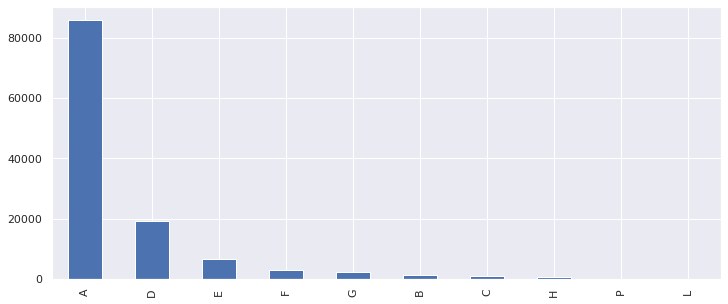

In [55]:
df.reserved_room_type.value_counts().plot(kind='bar')

### **Observation**
### **1.Most of the Guests Book room type 'A' which is 64.70% with 56552 bookings**
### **2.Second with type 'D' with 17398 bookings and type E with 6049 bookings**
### **3.Room type 'L' and 'P' is booked very few times with only 6 booking**



##**How the Room is Booked**

In [70]:
print(df.columns.tolist())

['hotel', 'is_canceled', 'lead_time', 'arrival_date_year', 'arrival_date_month', 'arrival_date_week_number', 'arrival_date_day_of_month', 'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children', 'babies', 'meal', 'country', 'market_segment', 'distribution_channel', 'is_repeated_guest', 'previous_cancellations', 'previous_bookings_not_canceled', 'reserved_room_type', 'assigned_room_type', 'booking_changes', 'deposit_type', 'days_in_waiting_list', 'customer_type', 'adr', 'required_car_parking_spaces', 'total_of_special_requests', 'reservation_status', 'reservation_status_date']


In [60]:
print(df.market_segment.unique().tolist())

['Direct', 'Corporate', 'Online TA', 'Offline TA/TO', 'Complementary', 'Groups', 'Undefined', 'Aviation']


In [61]:
df.market_segment.nunique()

8

**There are a total of 8 different Marketting segments**

In [62]:
df.market_segment.value_counts()

Online TA        56477
Offline TA/TO    24219
Groups           19811
Direct           12606
Corporate         5295
Complementary      743
Aviation           237
Undefined            2
Name: market_segment, dtype: int64

In [63]:
df.market_segment.value_counts(normalize=True)

Online TA        0.473046
Offline TA/TO    0.202856
Groups           0.165935
Direct           0.105587
Corporate        0.044350
Complementary    0.006223
Aviation         0.001985
Undefined        0.000017
Name: market_segment, dtype: float64

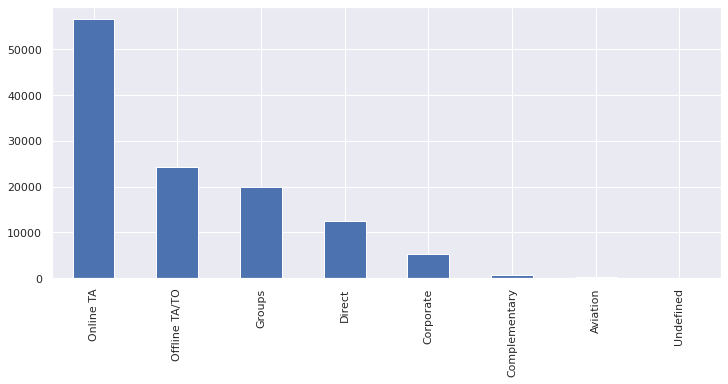

In [68]:
df.market_segment.value_counts().plot(kind='bar')

### **Observation**
### **1.Most of the Guests are from 'Online TA' which is 59.06% with 51618 bookings**
### **2.Followed by 'Offline TA' and 'direct' are almost same at 15.89 and 13.5%**

## **Which distribution channel contributes most to ADR**

In [72]:
print(df.columns.tolist())

['hotel', 'is_canceled', 'lead_time', 'arrival_date_year', 'arrival_date_month', 'arrival_date_week_number', 'arrival_date_day_of_month', 'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children', 'babies', 'meal', 'country', 'market_segment', 'distribution_channel', 'is_repeated_guest', 'previous_cancellations', 'previous_bookings_not_canceled', 'reserved_room_type', 'assigned_room_type', 'booking_changes', 'deposit_type', 'days_in_waiting_list', 'customer_type', 'adr', 'required_car_parking_spaces', 'total_of_special_requests', 'reservation_status', 'reservation_status_date']


In [139]:
df.distribution_channel.unique()

array(['Direct', 'Corporate', 'TA/TO', 'Undefined', 'GDS'], dtype=object)

In [135]:
df.adr.value_counts().reset_index().sort_values('adr',ascending=False)

,index,adr
0,62.00,3754
1,75.00,2715
2,90.00,2473
3,65.00,2418
4,0.00,1959
...,...,...
6122,194.06,1
6123,163.22,1
6124,176.91,1
6125,150.06,1


In [131]:
df_adr=df.groupby(['distribution_channel','hotel'])['adr'].mean().reset_index()


Text(0.5, 1.0, 'ADR wrt Distribution Channels')

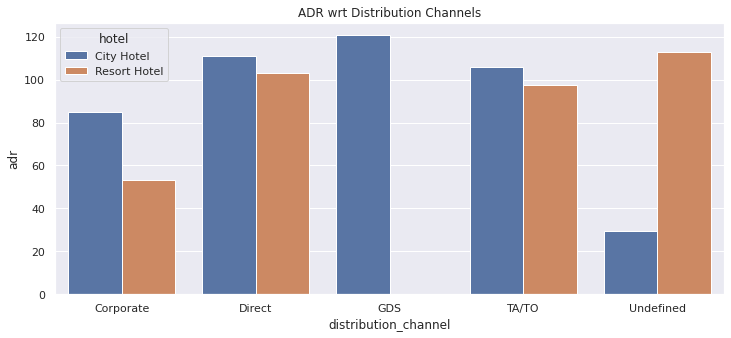

In [130]:
sns.barplot(x='distribution_channel', y='adr', data=df_adr, hue='hotel')
plt.title('ADR wrt Distribution Channels')

In [134]:
df_adr.sort_values(by='adr',ascending=False)

,distribution_channel,hotel,adr
4,GDS,City Hotel,120.554301
8,Undefined,Resort Hotel,112.700000
2,Direct,City Hotel,110.808417
5,TA/TO,City Hotel,105.742511
3,Direct,Resort Hotel,103.074526
6,TA/TO,Resort Hotel,97.453947
0,Corporate,City Hotel,84.718104
1,Corporate,Resort Hotel,53.277788
7,Undefined,City Hotel,29.625000


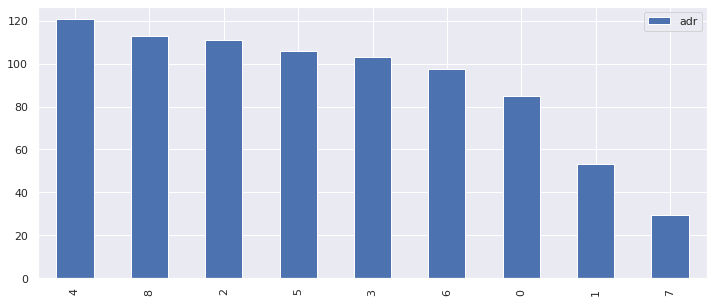

In [141]:
df_adr.sort_values('adr',ascending=False).plot(kind='bar')


In [137]:
df.adr.mean()

101.83112153446686

### **Observation**
### **1.Most of the ADR is contributed by GDS and TA and Direct**
### **2.Most of the Guests are Booking from 'GDS' and in most cases the City hotels gets more bookings**
### **3.Undefined- Bookings are undefined so most probable bookings are on arrival.**

## **Deposit type for the Booking**

In [147]:
df.deposit_type.unique()

array(['No Deposit', 'Refundable', 'Non Refund'], dtype=object)

In [148]:
df.deposit_type.value_counts()

No Deposit    104641
Non Refund     14587
Refundable       162
Name: deposit_type, dtype: int64

In [149]:
df.deposit_type.value_counts(normalize=True)

No Deposit    0.876464
Non Refund    0.122179
Refundable    0.001357
Name: deposit_type, dtype: float64

### **Observation**
### **1.87.64% of the people don't make a Deposit with 104641 records**
### **2.12.21% of the people make non refundable deposits with 14587**


## **Meal statistics from the hotels**

In [151]:
df.meal.unique()

array(['BB', 'FB', 'HB', 'SC', 'Undefined'], dtype=object)

In [152]:
df.meal.value_counts()

BB           92310
HB           14463
SC           10650
Undefined     1169
FB             798
Name: meal, dtype: int64

In [153]:
df.meal.value_counts(normalize=True)

BB           0.773180
HB           0.121141
SC           0.089203
Undefined    0.009791
FB           0.006684
Name: meal, dtype: float64

### **Observation**
###**1.Out of the meals, BB (Bed & Breakfast) is the most ordered meal which is around 77.31%, followed by HB(Half Board), SC(no meal package), Undefined and FB (Full Board)**

## **How many Guests are repeated guests**

In [156]:
df['is_repeated_guest'].value_counts()

0    115580
1      3810
Name: is_repeated_guest, dtype: int64

In [157]:
df['is_repeated_guest'].value_counts(normalize=True)

0    0.968088
1    0.031912
Name: is_repeated_guest, dtype: float64

### **Observation**
### **1.96.80% of the guests are not repeated guest**
### **2.Only 3.19% of the guests are repeated guest**
